<a href="https://colab.research.google.com/github/AltamarMx/ai_fluidmechanics/blob/main/notebooks/004_Poiseuille_Trainning_Saving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np


In [2]:
def poiseuille(R=1,dpdx=-0.01,nu=0.01,Nr=100,figure=True):
  
  r = np.linspace(-R,R,Nr)
  u = -1/4/nu *dpdx*(R**2-r**2)

  if figure:
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(r,u)
    ax.set_ylabel("u [m/s]")
    ax.set_xlabel("r [m]")
  umax = -1/4/nu*dpdx*R*R
  Re = umax*2*R/nu
  return Re,r,u

50.0

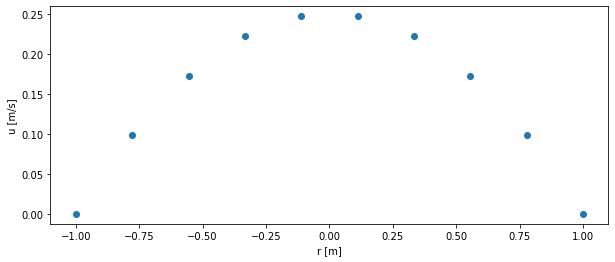

In [7]:
Re,r,u = poiseuille(Nr=10,figure=True)
Re

In [9]:
Re

50.0

In [10]:
r

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [11]:
u

array([0.        , 0.09876543, 0.17283951, 0.22222222, 0.24691358,
       0.24691358, 0.22222222, 0.17283951, 0.09876543, 0.        ])

In [12]:
Re = []
profile = []

for dpdx in np.linspace(-0.001,-0.01,1000):
  re, r, u = poiseuille(dpdx=dpdx,figure=False,Nr=10)
  Re.append([re]),
  profile.append(u)
profile = np.array(profile)
Re      = np.array(Re)

In [13]:
Re

array([[ 5.        ],
       [ 5.04504505],
       [ 5.09009009],
       [ 5.13513514],
       [ 5.18018018],
       [ 5.22522523],
       [ 5.27027027],
       [ 5.31531532],
       [ 5.36036036],
       [ 5.40540541],
       [ 5.45045045],
       [ 5.4954955 ],
       [ 5.54054054],
       [ 5.58558559],
       [ 5.63063063],
       [ 5.67567568],
       [ 5.72072072],
       [ 5.76576577],
       [ 5.81081081],
       [ 5.85585586],
       [ 5.9009009 ],
       [ 5.94594595],
       [ 5.99099099],
       [ 6.03603604],
       [ 6.08108108],
       [ 6.12612613],
       [ 6.17117117],
       [ 6.21621622],
       [ 6.26126126],
       [ 6.30630631],
       [ 6.35135135],
       [ 6.3963964 ],
       [ 6.44144144],
       [ 6.48648649],
       [ 6.53153153],
       [ 6.57657658],
       [ 6.62162162],
       [ 6.66666667],
       [ 6.71171171],
       [ 6.75675676],
       [ 6.8018018 ],
       [ 6.84684685],
       [ 6.89189189],
       [ 6.93693694],
       [ 6.98198198],
       [ 7

In [14]:
profile

array([[0.        , 0.00987654, 0.01728395, ..., 0.01728395, 0.00987654,
        0.        ],
       [0.        , 0.00996552, 0.01743966, ..., 0.01743966, 0.00996552,
        0.        ],
       [0.        , 0.0100545 , 0.01759537, ..., 0.01759537, 0.0100545 ,
        0.        ],
       ...,
       [0.        , 0.09858748, 0.17252808, ..., 0.17252808, 0.09858748,
        0.        ],
       [0.        , 0.09867645, 0.17268379, ..., 0.17268379, 0.09867645,
        0.        ],
       [0.        , 0.09876543, 0.17283951, ..., 0.17283951, 0.09876543,
        0.        ]])

In [15]:
scaler_profile  = np.max(profile)
scaler_reynolds = np.max(Re)
profile_scaled  = profile/scaler_profile
Re_scaled       = Re/scaler_reynolds

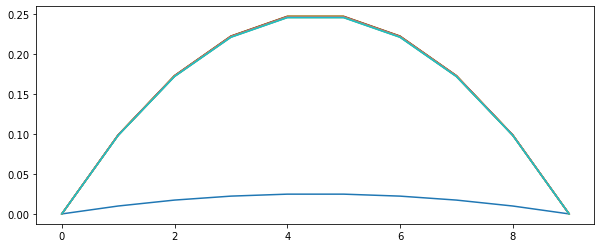

In [16]:
fig, ax = plt.subplots(figsize=(10,4))
for i in range(10):
  ax.plot(profile[-i,:])

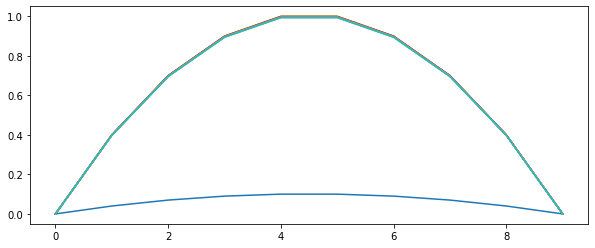

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
for i in range(10):
  ax.plot(profile_scaled[-i,:])

In [18]:
X_train, X_test, y_train, y_test  = train_test_split(Re_scaled,profile_scaled)

In [ ]:
X_test

In [22]:
y_test

array([[0.        , 0.33369369, 0.58396396, ..., 0.58396396, 0.33369369,
        0.        ],
       [0.        , 0.29657658, 0.51900901, ..., 0.51900901, 0.29657658,
        0.        ],
       [0.        , 0.0836036 , 0.14630631, ..., 0.14630631, 0.0836036 ,
        0.        ],
       ...,
       [0.        , 0.13693694, 0.23963964, ..., 0.23963964, 0.13693694,
        0.        ],
       [0.        , 0.14234234, 0.2490991 , ..., 0.2490991 , 0.14234234,
        0.        ],
       [0.        , 0.07747748, 0.13558559, ..., 0.13558559, 0.07747748,
        0.        ]])

In [23]:
model = keras.Sequential()
model.add(keras.Input(shape=1))
model.add(layers.Dense(20,activation='leaky_relu',use_bias=True)) 
model.add(layers.Dense(10,activation='leaky_relu',use_bias=False)) 
model.compile(loss='MSE',optimizer=keras.optimizers.SGD(learning_rate=0.0001))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                200       
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


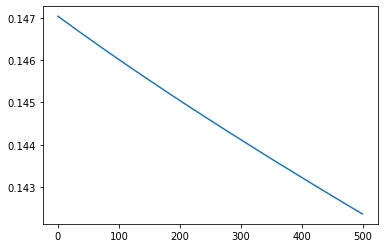

In [29]:
problem = model.fit(X_train,
                    y_train,
                    epochs=500,
                    verbose=False)
plt.plot(problem.history['loss'])

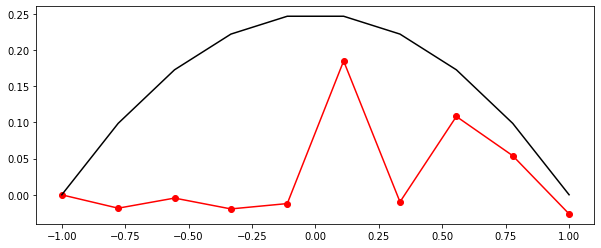

In [30]:
p_profile = model.predict([50]/scaler_reynolds)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(r,p_profile.flatten()*scaler_profile ,'r-o')
ax.plot(r,profile[-1] ,'k-')

In [31]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [36]:
!ls drive/MyDrive/Poiseuille/

data  h5


In [ ]:
# model.save('./drive/MyDrive/Poiseuille/h5/Poiseuille.h5')

In [71]:
np.savetxt("./drive/MyDrive/Poiseuille/data/Re.txt",Re)
np.savetxt("./drive/MyDrive/Poiseuille/data/Profile.txt",profile)
np.savetxt("./drive/MyDrive/Poiseuille/data/r.txt",r)
np.savetxt("./drive/MyDrive/Poiseuille/data/X_train.txt",X_train)
np.savetxt("./drive/MyDrive/Poiseuille/data/X_test.txt",X_test)
np.savetxt("./drive/MyDrive/Poiseuille/data/y_train.txt",y_train)
np.savetxt("./drive/MyDrive/Poiseuille/data/y_test.txt",y_test)